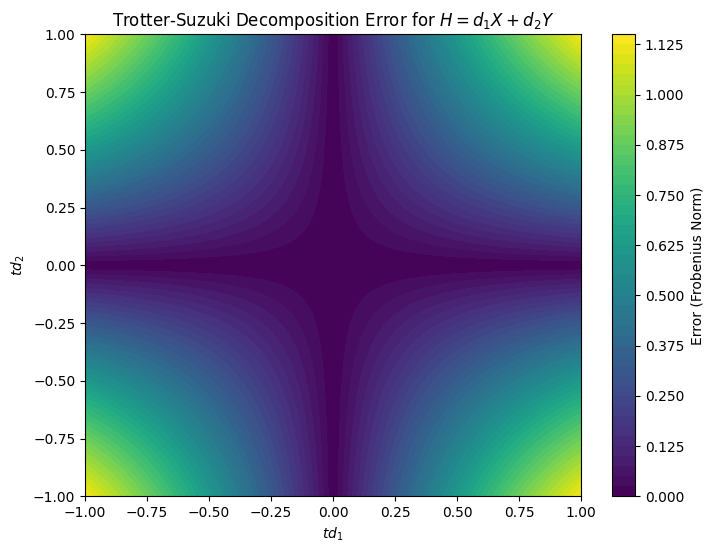

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Pauli Matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])

# Exact Evolution Function
def exact_evolution(H, t):
    return expm(-1j * t * H)

# Trotterized Evolution (First Order)
def trotter_evolution(d1, d2, t):
    U1 = expm(-1j * t * d1 * X)  # Evolution under d1 X
    U2 = expm(-1j * t * d2 * Y)  # Evolution under d2 Y
    return np.dot(U2, U1)  # First-order Trotter step

# Error Function (Frobenius Norm)
def trotter_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

# Grid for t*d1 and t*d2
t = 1.0  # Fixed evolution time
td1 = np.linspace(-1, 1, 100)
td2 = np.linspace(-1, 1, 100)
TD1, TD2 = np.meshgrid(td1, td2)

# Compute Error
errors = np.zeros_like(TD1)
for i in range(TD1.shape[0]):
    for j in range(TD1.shape[1]):
        d1 = TD1[i, j] / t
        d2 = TD2[i, j] / t
        errors[i, j] = trotter_error(d1, d2, t)

# Plot
plt.figure(figsize=(8, 6))
contour = plt.contourf(TD1, TD2, errors, levels=50, cmap='viridis')
plt.colorbar(contour, label='Error (Frobenius Norm)')
plt.xlabel('$t d_1$')
plt.ylabel('$t d_2$')
plt.title('Trotter-Suzuki Decomposition Error for $H = d_1 X + d_2 Y$')
plt.show()


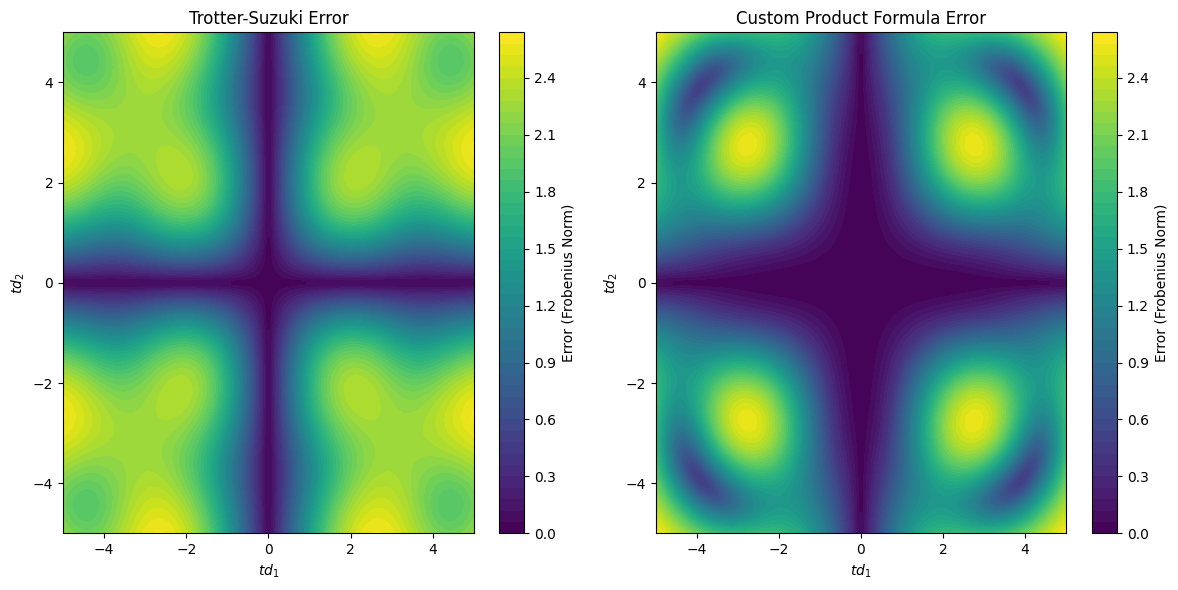

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Pauli Matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])

# Exact Evolution Function
def exact_evolution(H, t):
    return expm(-1j * t * H)

# Trotterized Evolution (First Order)
def trotter_evolution(d1, d2, t):
    U1 = expm(-1j * t * d1 * X)  # Evolution under d1 X
    U2 = expm(-1j * t * d2 * Y)  # Evolution under d2 Y
    return np.dot(U2, U1)  # First-order Trotter step

# Custom Product Formula Evolution
def custom_product_evolution(d1, d2, t):
    A = d1 * X
    B = d2 * Y
    U1 = expm(-1j * t * A / 2)  # exp(tA/2)
    U2 = expm(-1j * t * B)      # exp(tB)
    U3 = expm(-1j * t * B / 2)  # exp(tB/2)
    U4 = expm(-1j * t * A)      # exp(tA)

    term1 = (2 / 3) * U1 @ U2 @ U1
    term2 = (2 / 3) * U3 @ U4 @ U3
    term3 = -(1 / 6) * (U4 @ U2 + U2 @ U4)

    return term1 + term2 + term3

# Error Function (Frobenius Norm)
def trotter_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def custom_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_custom = custom_product_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_custom, 'fro')  # Frobenius norm
    return error

# Grid for t*d1 and t*d2
t = 1.0  # Fixed evolution time
td1 = np.linspace(-5, 5, 100)
td2 = np.linspace(-5, 5, 100)
TD1, TD2 = np.meshgrid(td1, td2)

# Compute Errors
errors_trotter = np.zeros_like(TD1)
errors_custom = np.zeros_like(TD1)
for i in range(TD1.shape[0]):
    for j in range(TD1.shape[1]):
        d1 = TD1[i, j] / t
        d2 = TD2[i, j] / t
        errors_trotter[i, j] = trotter_error(d1, d2, t)
        errors_custom[i, j] = custom_error(d1, d2, t)

# Plot Side by Side
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Trotter-Suzuki Error Plot
contour1 = axes[0].contourf(TD1, TD2, errors_trotter, levels=50, cmap='viridis')
fig.colorbar(contour1, ax=axes[0], label='Error (Frobenius Norm)')
axes[0].set_xlabel('$t d_1$')
axes[0].set_ylabel('$t d_2$')
axes[0].set_title('Trotter-Suzuki Error')

# Custom Product Formula Error Plot
contour2 = axes[1].contourf(TD1, TD2, errors_custom, levels=50, cmap='viridis')
fig.colorbar(contour2, ax=axes[1], label='Error (Frobenius Norm)')
axes[1].set_xlabel('$t d_1$')
axes[1].set_ylabel('$t d_2$')
axes[1].set_title('Custom Product Formula Error')

plt.tight_layout()
plt.show()


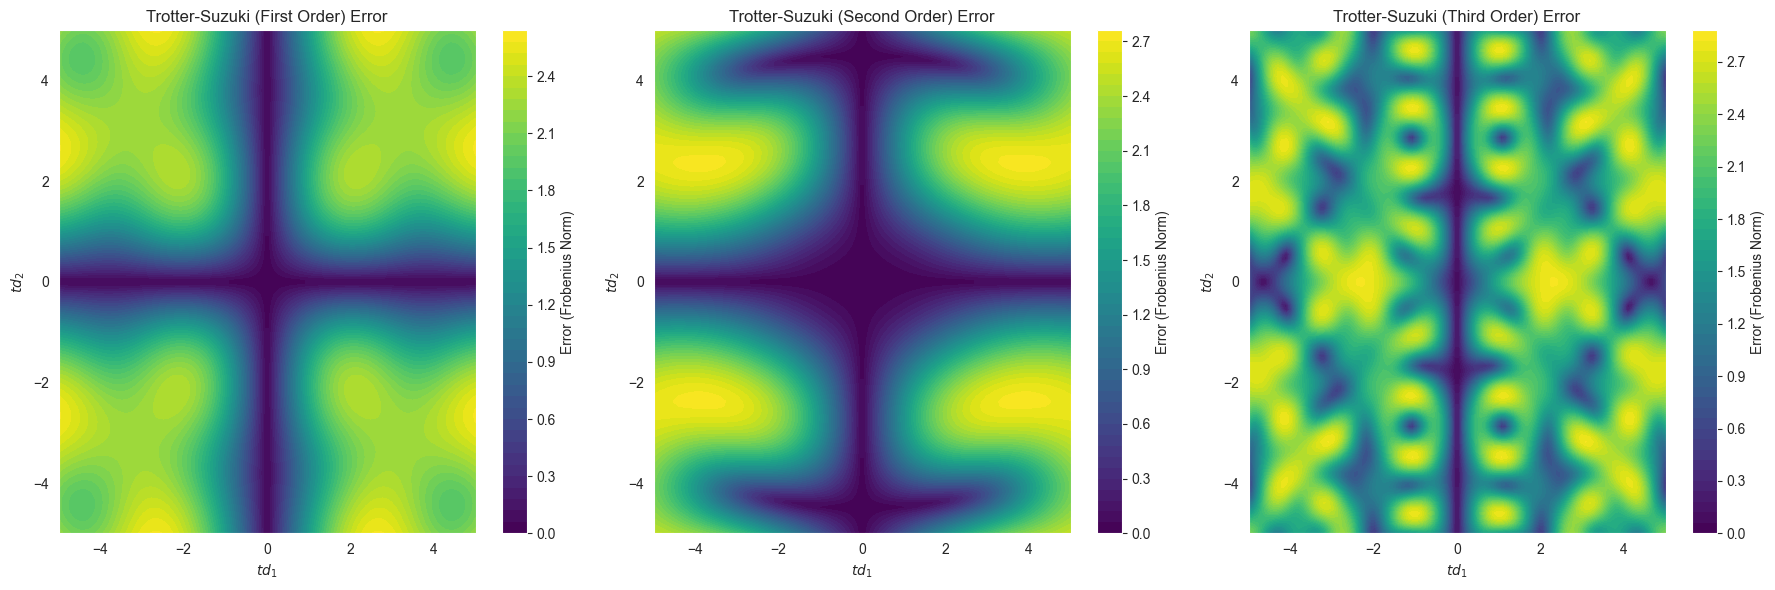

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Pauli Matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])

# Exact Evolution Function
def exact_evolution(H, t):
    return expm(-1j * t * H)

# Trotterized Evolution (First Order)
def trotter_evolution(d1, d2, t):
    U1 = expm(-1j * t * d1 * X)  # Evolution under d1 X
    U2 = expm(-1j * t * d2 * Y)  # Evolution under d2 Y
    return np.dot(U2, U1)  # First-order Trotter step

# Trotterized Evolution (Second Order)
def trotter_second_order_evolution(d1, d2, t):
    U1 = expm(-1j * t * d1 * X / 2)  # exp(t/2 * d1 * X)
    U2 = expm(-1j * t * d2 * Y)      # exp(t * d2 * Y)
    return U1 @ U2 @ U1  # Symmetric second-order Trotter

def trotter_third_order_evolution(d1, d2, t):
    A = d1 * X
    B = d2 * Y

    # Coefficients for the third-order Trotter-Suzuki decomposition
    a1 = 1 / (2 - 2 ** (1 / 3))
    a2 = -2 ** (1 / 3) / (2 - 2 ** (1 / 3))
    a3 = a1
    b1 = 1 / (2 - 2 ** (1 / 3))
    b2 = -2 ** (1 / 3) / (2 - 2 ** (1 / 3))
    b3 = b1

    # Construct the sequence of exponentials
    U1 = expm(-1j * a1 * t * A)
    U2 = expm(-1j * b1 * t * B)
    U3 = expm(-1j * a2 * t * A)
    U4 = expm(-1j * b2 * t * B)
    U5 = expm(-1j * a3 * t * A)
    U6 = expm(-1j * b3 * t * B)
    U7 = expm(-1j * a1 * t * A)

    # Combine the terms
    return U1 @ U2 @ U3 @ U4 @ U5 @ U6 @ U7

# Custom Product Formula Evolution
def custom_product_evolution(d1, d2, t):
    A = d1 * X
    B = d2 * Y
    U1 = expm(-1j * t * A / 2)  # exp(tA/2)
    U2 = expm(-1j * t * B)      # exp(tB)
    U3 = expm(-1j * t * B / 2)  # exp(tB/2)
    U4 = expm(-1j * t * A)      # exp(tA)

    term1 = (2 / 3) * U1 @ U2 @ U1
    term2 = (2 / 3) * U3 @ U4 @ U3
    term3 = -(1 / 6) * (U4 @ U2 + U2 @ U4)

    return term1 + term2 + term3

# Error Function (Frobenius Norm)
def trotter_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def trotter_second_order_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_second_order_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def trotter_third_order_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_third_order_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def custom_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_custom = custom_product_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_custom, 'fro')  # Frobenius norm
    return error

# Grid for t*d1 and t*d2
t = 1.0  # Fixed evolution time
td1 = np.linspace(-5, 5, 100)
td2 = np.linspace(-5, 5, 100)
TD1, TD2 = np.meshgrid(td1, td2)

# Compute Errors
errors_trotter = np.zeros_like(TD1)
errors_trotter_second = np.zeros_like(TD1)
errors_trotter_third = np.zeros_like(TD1)
errors_custom = np.zeros_like(TD1)
for i in range(TD1.shape[0]):
    for j in range(TD1.shape[1]):
        d1 = TD1[i, j] / t
        d2 = TD2[i, j] / t
        errors_trotter[i, j] = trotter_error(d1, d2, t)
        errors_trotter_second[i, j] = trotter_second_order_error(d1, d2, t)
        errors_trotter_third[i, j] = trotter_third_order_error(d1, d2, t)
        errors_custom[i, j] = custom_error(d1, d2, t)

# Plot Side by Side
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Trotter-Suzuki (First Order) Error Plot
contour1 = axes[0].contourf(TD1, TD2, errors_trotter, levels=50, cmap='viridis')
fig.colorbar(contour1, ax=axes[0], label='Error (Frobenius Norm)')
axes[0].set_xlabel('$t d_1$')
axes[0].set_ylabel('$t d_2$')
axes[0].set_title('Trotter-Suzuki (First Order) Error')

# Trotter-Suzuki (Second Order) Error Plot
contour2 = axes[1].contourf(TD1, TD2, errors_trotter_second, levels=50, cmap='viridis')
fig.colorbar(contour2, ax=axes[1], label='Error (Frobenius Norm)')
axes[1].set_xlabel('$t d_1$')
axes[1].set_ylabel('$t d_2$')
axes[1].set_title('Trotter-Suzuki (Second Order) Error')

# Trotter-Suzuki (Third Order) Error Plot
contour3 = axes[2].contourf(TD1, TD2, errors_trotter_third, levels=50, cmap='viridis')
fig.colorbar(contour3, ax=axes[2], label='Error (Frobenius Norm)')
axes[2].set_xlabel('$t d_1$')
axes[2].set_ylabel('$t d_2$')
axes[2].set_title('Trotter-Suzuki (Third Order) Error')

plt.tight_layout()
plt.show()


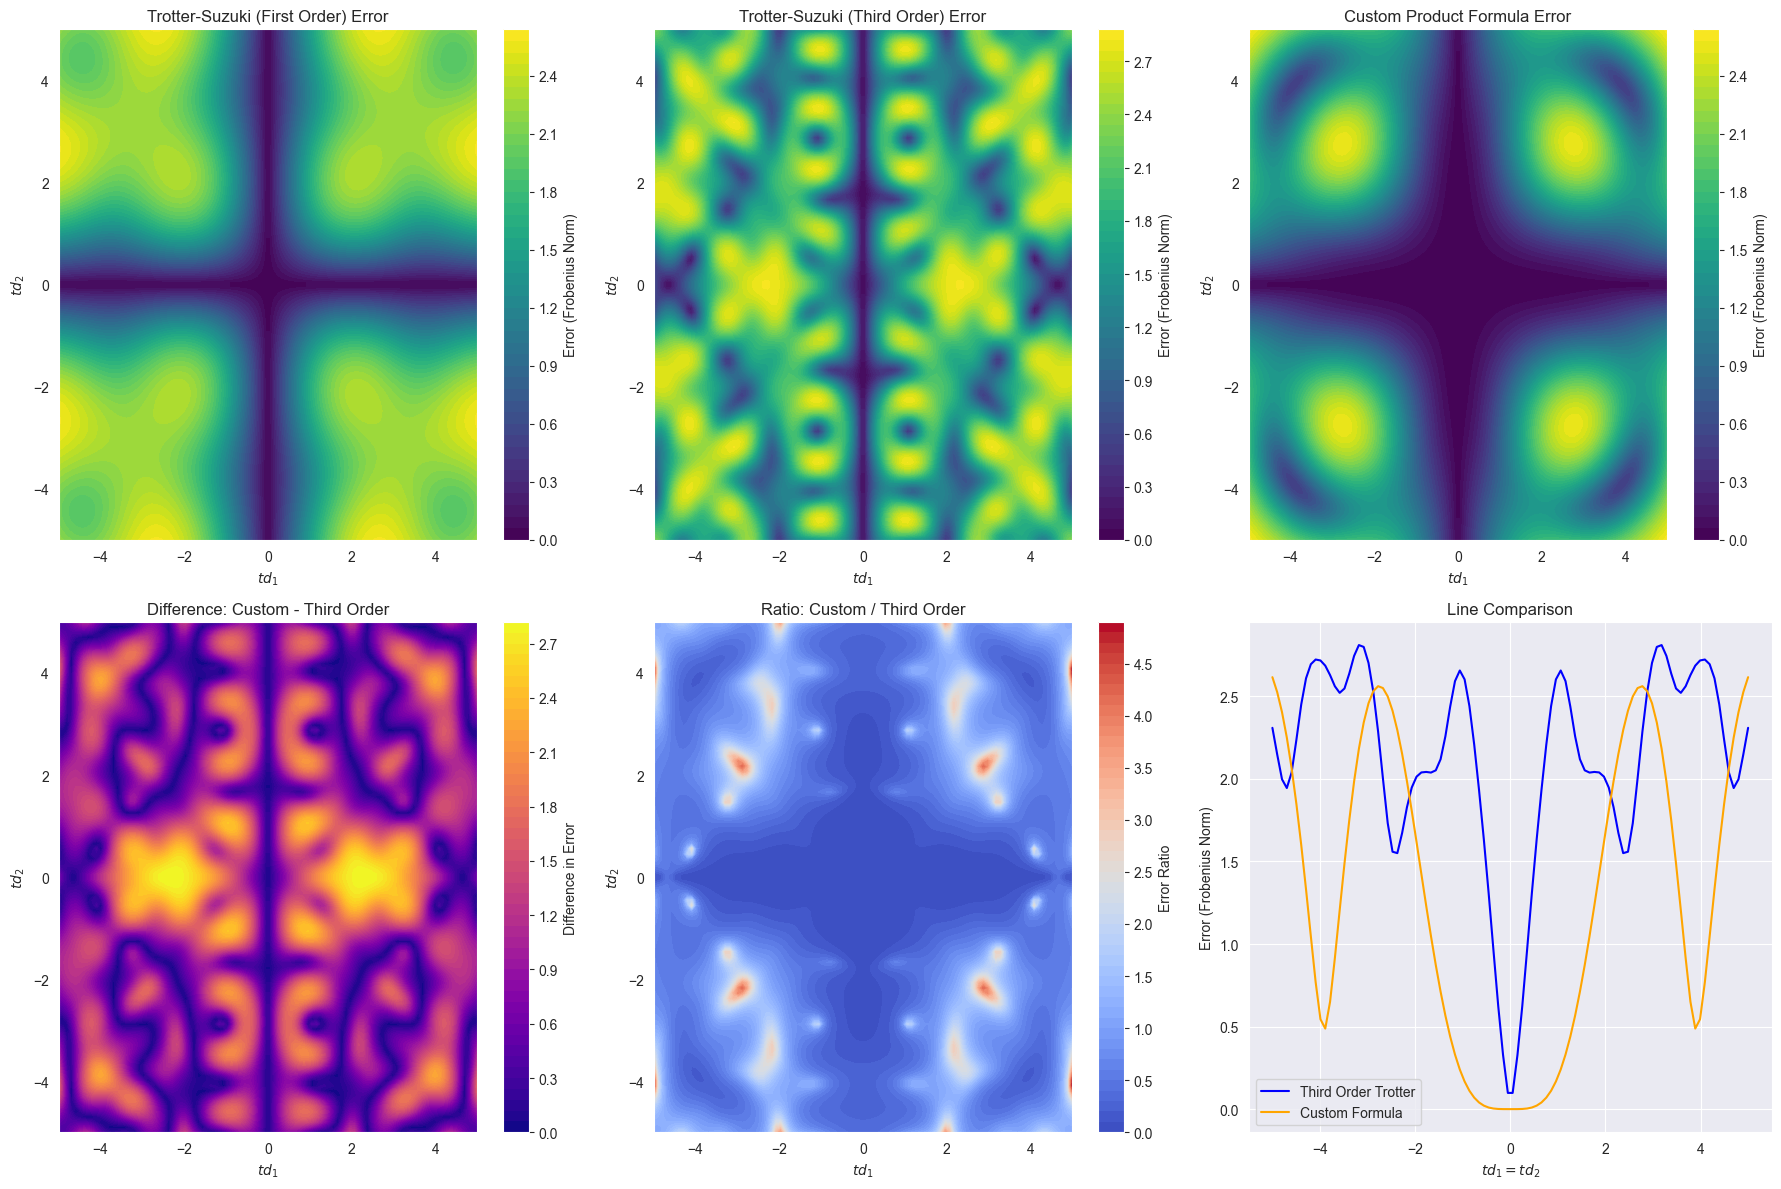

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Pauli Matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])

# Exact Evolution Function
def exact_evolution(H, t):
    return expm(-1j * t * H)

# Trotterized Evolution (First Order)
def trotter_evolution(d1, d2, t):
    U1 = expm(-1j * t * d1 * X)  # Evolution under d1 X
    U2 = expm(-1j * t * d2 * Y)  # Evolution under d2 Y
    return np.dot(U2, U1)  # First-order Trotter step

def trotter_third_order_evolution(d1, d2, t):
    A = d1 * X
    B = d2 * Y

    # Coefficients for the third-order Trotter-Suzuki decomposition
    a1 = 1 / (2 - 2 ** (1 / 3))
    a2 = -2 ** (1 / 3) / (2 - 2 ** (1 / 3))
    a3 = a1
    b1 = 1 / (2 - 2 ** (1 / 3))
    b2 = -2 ** (1 / 3) / (2 - 2 ** (1 / 3))
    b3 = b1

    # Construct the sequence of exponentials
    U1 = expm(-1j * a1 * t * A)
    U2 = expm(-1j * b1 * t * B)
    U3 = expm(-1j * a2 * t * A)
    U4 = expm(-1j * b2 * t * B)
    U5 = expm(-1j * a3 * t * A)
    U6 = expm(-1j * b3 * t * B)
    U7 = expm(-1j * a1 * t * A)

    # Combine the terms
    return U1 @ U2 @ U3 @ U4 @ U5 @ U6 @ U7

# Custom Product Formula Evolution
def custom_product_evolution(d1, d2, t):
    A = d1 * X
    B = d2 * Y
    U1 = expm(-1j * t * A / 2)  # exp(tA/2)
    U2 = expm(-1j * t * B)      # exp(tB)
    U3 = expm(-1j * t * B / 2)  # exp(tB/2)
    U4 = expm(-1j * t * A)      # exp(tA)

    term1 = (2 / 3) * U1 @ U2 @ U1
    term2 = (2 / 3) * U3 @ U4 @ U3
    term3 = -(1 / 6) * (U4 @ U2 + U2 @ U4)

    return term1 + term2 + term3

# Error Function (Frobenius Norm)
def trotter_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def trotter_third_order_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_third_order_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def custom_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_custom = custom_product_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_custom, 'fro')  # Frobenius norm
    return error

# Grid for t*d1 and t*d2
t = 1.0  # Fixed evolution time
td1 = np.linspace(-5, 5, 100)
td2 = np.linspace(-5, 5, 100)
TD1, TD2 = np.meshgrid(td1, td2)

# Compute Errors
errors_trotter = np.zeros_like(TD1)
errors_trotter_third = np.zeros_like(TD1)
errors_custom = np.zeros_like(TD1)
difference_custom_third = np.zeros_like(TD1)
ratio_custom_third = np.zeros_like(TD1)
for i in range(TD1.shape[0]):
    for j in range(TD1.shape[1]):
        d1 = TD1[i, j] / t
        d2 = TD2[i, j] / t
        errors_trotter[i, j] = trotter_error(d1, d2, t)
        errors_trotter_third[i, j] = trotter_third_order_error(d1, d2, t)
        errors_custom[i, j] = custom_error(d1, d2, t)
        difference_custom_third[i, j] = abs(errors_custom[i, j] - errors_trotter_third[i, j])
        ratio_custom_third[i, j] = errors_custom[i, j] / errors_trotter_third[i, j]

# Plot Side by Side
fig, axes = plt.subplots(2, 3, figsize=(18, 12))

# Trotter-Suzuki (First Order) Error Plot
contour1 = axes[0, 0].contourf(TD1, TD2, errors_trotter, levels=50, cmap='viridis')
fig.colorbar(contour1, ax=axes[0, 0], label='Error (Frobenius Norm)')
axes[0, 0].set_xlabel('$t d_1$')
axes[0, 0].set_ylabel('$t d_2$')
axes[0, 0].set_title('Trotter-Suzuki (First Order) Error')

# Trotter-Suzuki (Third Order) Error Plot
contour2 = axes[0, 1].contourf(TD1, TD2, errors_trotter_third, levels=50, cmap='viridis')
fig.colorbar(contour2, ax=axes[0, 1], label='Error (Frobenius Norm)')
axes[0, 1].set_xlabel('$t d_1$')
axes[0, 1].set_ylabel('$t d_2$')
axes[0, 1].set_title('Trotter-Suzuki (Third Order) Error')

# Custom Product Formula Error Plot
contour3 = axes[0, 2].contourf(TD1, TD2, errors_custom, levels=50, cmap='viridis')
fig.colorbar(contour3, ax=axes[0, 2], label='Error (Frobenius Norm)')
axes[0, 2].set_xlabel('$t d_1$')
axes[0, 2].set_ylabel('$t d_2$')
axes[0, 2].set_title('Custom Product Formula Error')

# Difference Plot
contour4 = axes[1, 0].contourf(TD1, TD2, difference_custom_third, levels=50, cmap='plasma')
fig.colorbar(contour4, ax=axes[1, 0], label='Difference in Error')
axes[1, 0].set_xlabel('$t d_1$')
axes[1, 0].set_ylabel('$t d_2$')
axes[1, 0].set_title('Difference: Custom - Third Order')

# Ratio Plot
contour5 = axes[1, 1].contourf(TD1, TD2, ratio_custom_third, levels=50, cmap='coolwarm')
fig.colorbar(contour5, ax=axes[1, 1], label='Error Ratio')
axes[1, 1].set_xlabel('$t d_1$')
axes[1, 1].set_ylabel('$t d_2$')
axes[1, 1].set_title('Ratio: Custom / Third Order')

# Line Comparison along td1 = td2
line_idx = np.arange(len(td1))
line_errors_trotter_third = errors_trotter_third[line_idx, line_idx]
line_errors_custom = errors_custom[line_idx, line_idx]
axes[1, 2].plot(td1, line_errors_trotter_third, label='Third Order Trotter', color='blue')
axes[1, 2].plot(td1, line_errors_custom, label='Custom Formula', color='orange')
axes[1, 2].set_xlabel('$t d_1 = t d_2$')
axes[1, 2].set_ylabel('Error (Frobenius Norm)')
axes[1, 2].set_title('Line Comparison')
axes[1, 2].legend()

plt.tight_layout()
plt.show()


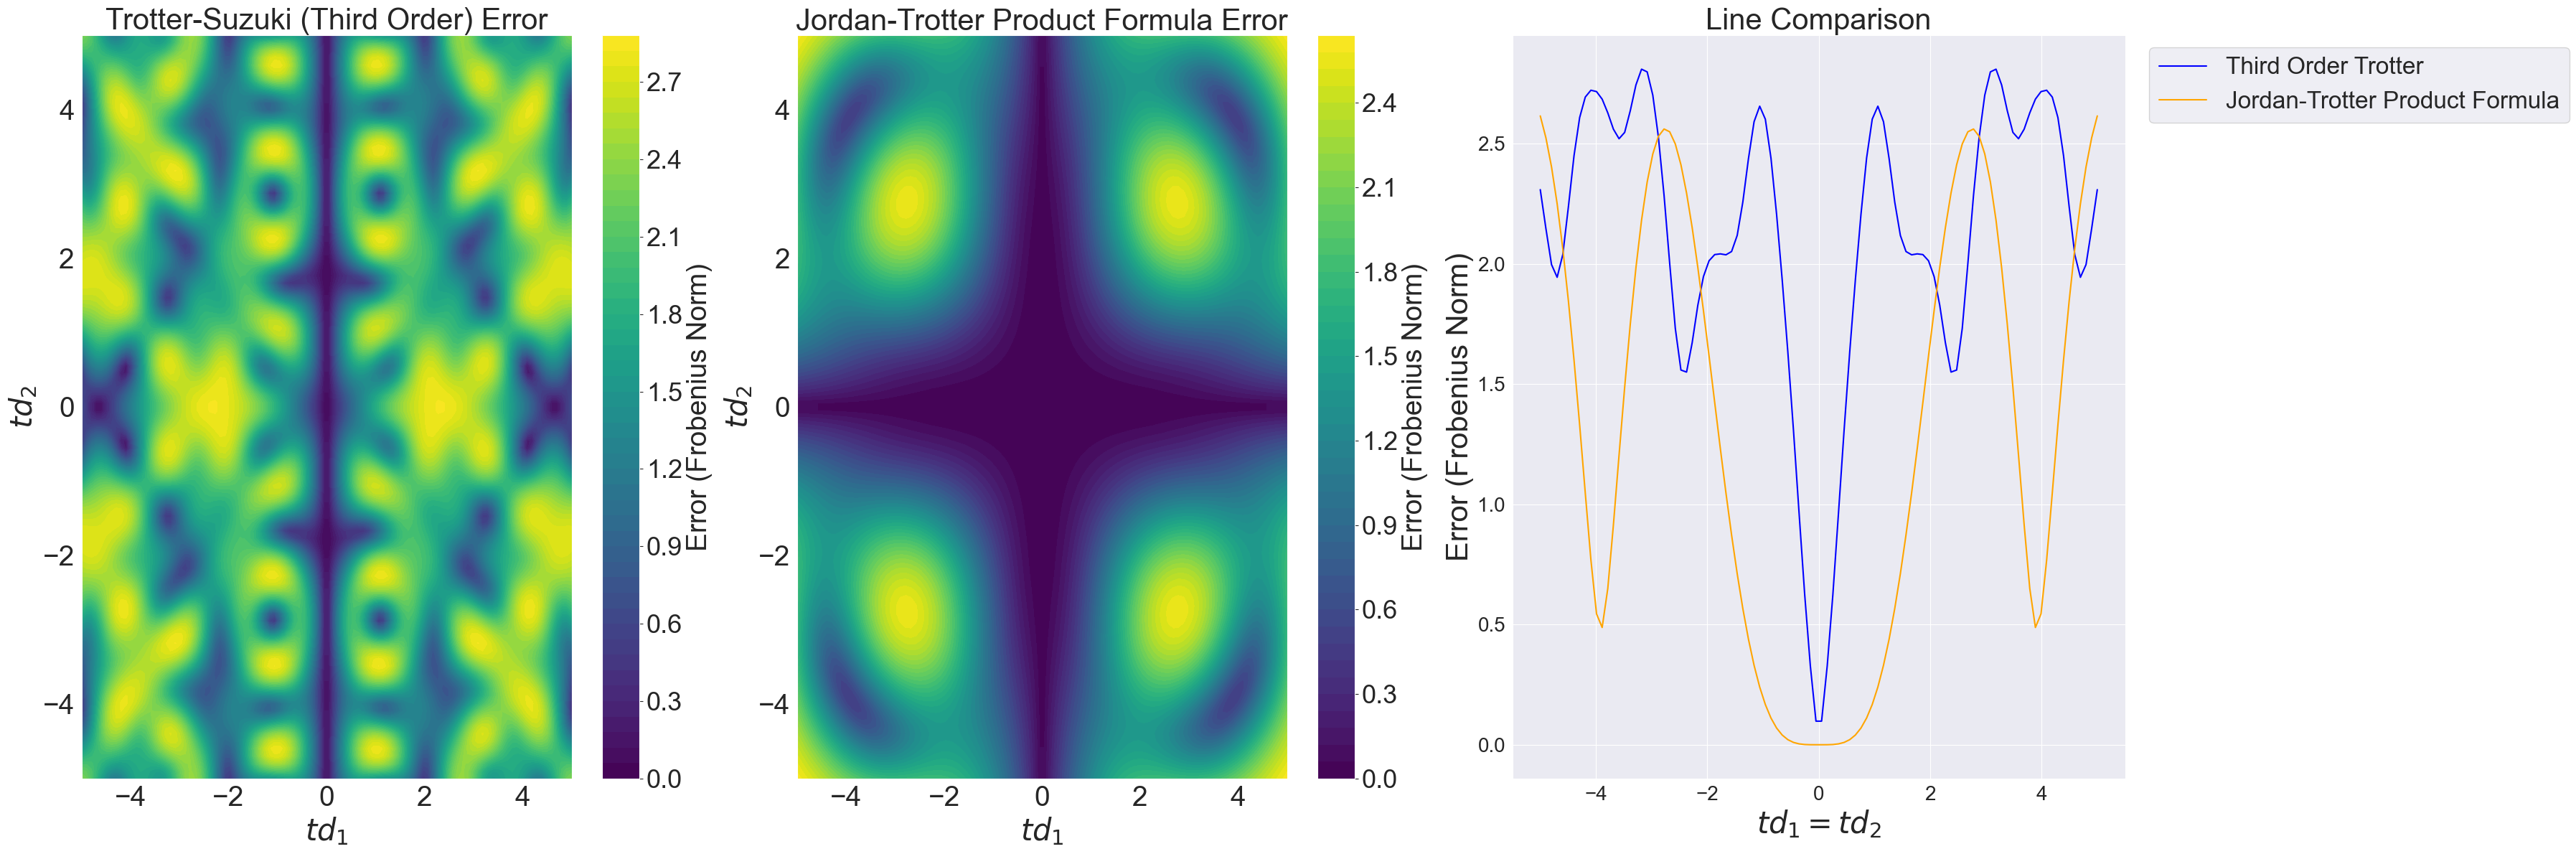

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm
import seaborn as sns

# Pauli Matrices
X = np.array([[0, 1], [1, 0]])
Y = np.array([[0, -1j], [1j, 0]])

# Exact Evolution Function
def exact_evolution(H, t):
    return expm(-1j * t * H)

# Trotterized Evolution (First Order)
def trotter_evolution(d1, d2, t):
    U1 = expm(-1j * t * d1 * X)  # Evolution under d1 X
    U2 = expm(-1j * t * d2 * Y)  # Evolution under d2 Y
    return np.dot(U2, U1)  # First-order Trotter step

def trotter_third_order_evolution(d1, d2, t):
    A = d1 * X
    B = d2 * Y

    # Coefficients for the third-order Trotter-Suzuki decomposition
    a1 = 1 / (2 - 2 ** (1 / 3))
    a2 = -2 ** (1 / 3) / (2 - 2 ** (1 / 3))
    a3 = a1
    b1 = 1 / (2 - 2 ** (1 / 3))
    b2 = -2 ** (1 / 3) / (2 - 2 ** (1 / 3))
    b3 = b1

    # Construct the sequence of exponentials
    U1 = expm(-1j * a1 * t * A)
    U2 = expm(-1j * b1 * t * B)
    U3 = expm(-1j * a2 * t * A)
    U4 = expm(-1j * b2 * t * B)
    U5 = expm(-1j * a3 * t * A)
    U6 = expm(-1j * b3 * t * B)
    U7 = expm(-1j * a1 * t * A)

    # Combine the terms
    return U1 @ U2 @ U3 @ U4 @ U5 @ U6 @ U7

# Custom Product Formula Evolution
def custom_product_evolution(d1, d2, t):
    A = d1 * X
    B = d2 * Y
    U1 = expm(-1j * t * A / 2)  # exp(tA/2)
    U2 = expm(-1j * t * B)      # exp(tB)
    U3 = expm(-1j * t * B / 2)  # exp(tB/2)
    U4 = expm(-1j * t * A)      # exp(tA)

    term1 = (2 / 3) * U1 @ U2 @ U1
    term2 = (2 / 3) * U3 @ U4 @ U3
    term3 = -(1 / 6) * (U4 @ U2 + U2 @ U4)

    return term1 + term2 + term3

# Error Function (Frobenius Norm)
def trotter_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def trotter_third_order_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_trotter = trotter_third_order_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_trotter, 'fro')  # Frobenius norm
    return error

def custom_error(d1, d2, t):
    H = d1 * X + d2 * Y
    U_exact = exact_evolution(H, t)
    U_custom = custom_product_evolution(d1, d2, t)
    error = np.linalg.norm(U_exact - U_custom, 'fro')  # Frobenius norm
    return error

# Grid for t*d1 and t*d2
t = 1.0  # Fixed evolution time
td1 = np.linspace(-5, 5, 100)
td2 = np.linspace(-5, 5, 100)
TD1, TD2 = np.meshgrid(td1, td2)

# Compute Errors
errors_trotter = np.zeros_like(TD1)
errors_trotter_third = np.zeros_like(TD1)
errors_custom = np.zeros_like(TD1)
difference_custom_third = np.zeros_like(TD1)
ratio_custom_third = np.zeros_like(TD1)
for i in range(TD1.shape[0]):
    for j in range(TD1.shape[1]):
        d1 = TD1[i, j] / t
        d2 = TD2[i, j] / t
        errors_trotter[i, j] = trotter_error(d1, d2, t)
        errors_trotter_third[i, j] = trotter_third_order_error(d1, d2, t)
        errors_custom[i, j] = custom_error(d1, d2, t)
        difference_custom_third[i, j] = abs(errors_custom[i, j] - errors_trotter_third[i, j])
        ratio_custom_third[i, j] = errors_custom[i, j] / errors_trotter_third[i, j]

# Plot Side by Side
fig, axes = plt.subplots(1, 3, figsize=(36, 12))

# Trotter-Suzuki (Third Order) Error Plot
contour2 = axes[0].contourf(TD1, TD2, errors_trotter_third, levels=50, cmap='viridis')
cbar2 = fig.colorbar(contour2, ax=axes[0])
cbar2.set_label('Error (Frobenius Norm)', fontsize=28)
cbar2.ax.tick_params(labelsize=26)
axes[0].set_xlabel('$t d_1$', fontsize=30)
axes[0].set_ylabel('$t d_2$', fontsize=30)
axes[0].set_title('Trotter-Suzuki (Third Order) Error', fontsize=30)
axes[0].tick_params(axis='both', which='major', labelsize=28)

# Custom Product Formula Error Plot
contour3 = axes[1].contourf(TD1, TD2, errors_custom, levels=50, cmap='viridis')
cbar3 = fig.colorbar(contour3, ax=axes[1])
cbar3.set_label('Error (Frobenius Norm)', fontsize=28)
cbar3.ax.tick_params(labelsize=26)
axes[1].set_xlabel('$t d_1$', fontsize=30)
axes[1].set_ylabel('$t d_2$', fontsize=30)
axes[1].tick_params(axis='both', which='major', labelsize=28)
axes[1].set_title('Jordan-Trotter Product Formula Error', fontsize=30)

# Line Comparison along td1 = td2
sns.set_style("darkgrid")
line_idx = np.arange(len(td1))
line_errors_trotter_third = errors_trotter_third[line_idx, line_idx]
line_errors_custom = errors_custom[line_idx, line_idx]
#axes[2].set_facecolor('lightgray')
axes[2].plot(td1, line_errors_trotter_third, label='Third Order Trotter', color='blue')
axes[2].plot(td1, line_errors_custom, label='Jordan-Trotter Product Formula', color='orange')
axes[2].set_xlabel('$t d_1 = t d_2$', fontsize=30)
axes[2].set_ylabel('Error (Frobenius Norm)', fontsize=30)
axes[2].set_title('Line Comparison', fontsize=30)
axes[2].tick_params(axis='both', which='major', labelsize=20)
axes[2].legend(fontsize=24, loc='upper left', bbox_to_anchor=(1.02, 1.0))

plt.tight_layout()
plt.show()
